<a href="https://colab.research.google.com/github/chaitanyam1/ML-LAB-WORK/blob/master/ML_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [80]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [82]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [83]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

dropping employeecount, Employee Number,Over18,StandardHours as they are not useful because of redundant values

In [0]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [85]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print()
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64

JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'H

In [86]:
len(object_col)

7

In [0]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [88]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        disc_col.append(column)
        print()
disc_col.remove('Attrition')

Attrition : [1 0]
0    1233
1     237
Name: Attrition, dtype: int64

DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

Education : [2 1 4 3 5]
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

EnvironmentSatisfaction : [2 3 4 1]
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

JobInvolvement : [3 2 4 1]
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

JobLevel : [2 1 3 4 5]
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

JobSatisfaction : [4 2 3 1]
4    459
3    442
1    289
2    280
Name: JobSatisfa

In [89]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 25:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print()

Age : Minimum: 18, Maximum: 60

DailyRate : Minimum: 102, Maximum: 1499

DistanceFromHome : Minimum: 1, Maximum: 29

HourlyRate : Minimum: 30, Maximum: 100

MonthlyIncome : Minimum: 1009, Maximum: 19999

MonthlyRate : Minimum: 2094, Maximum: 26999

TotalWorkingYears : Minimum: 0, Maximum: 40

YearsAtCompany : Minimum: 0, Maximum: 40



Visualisation


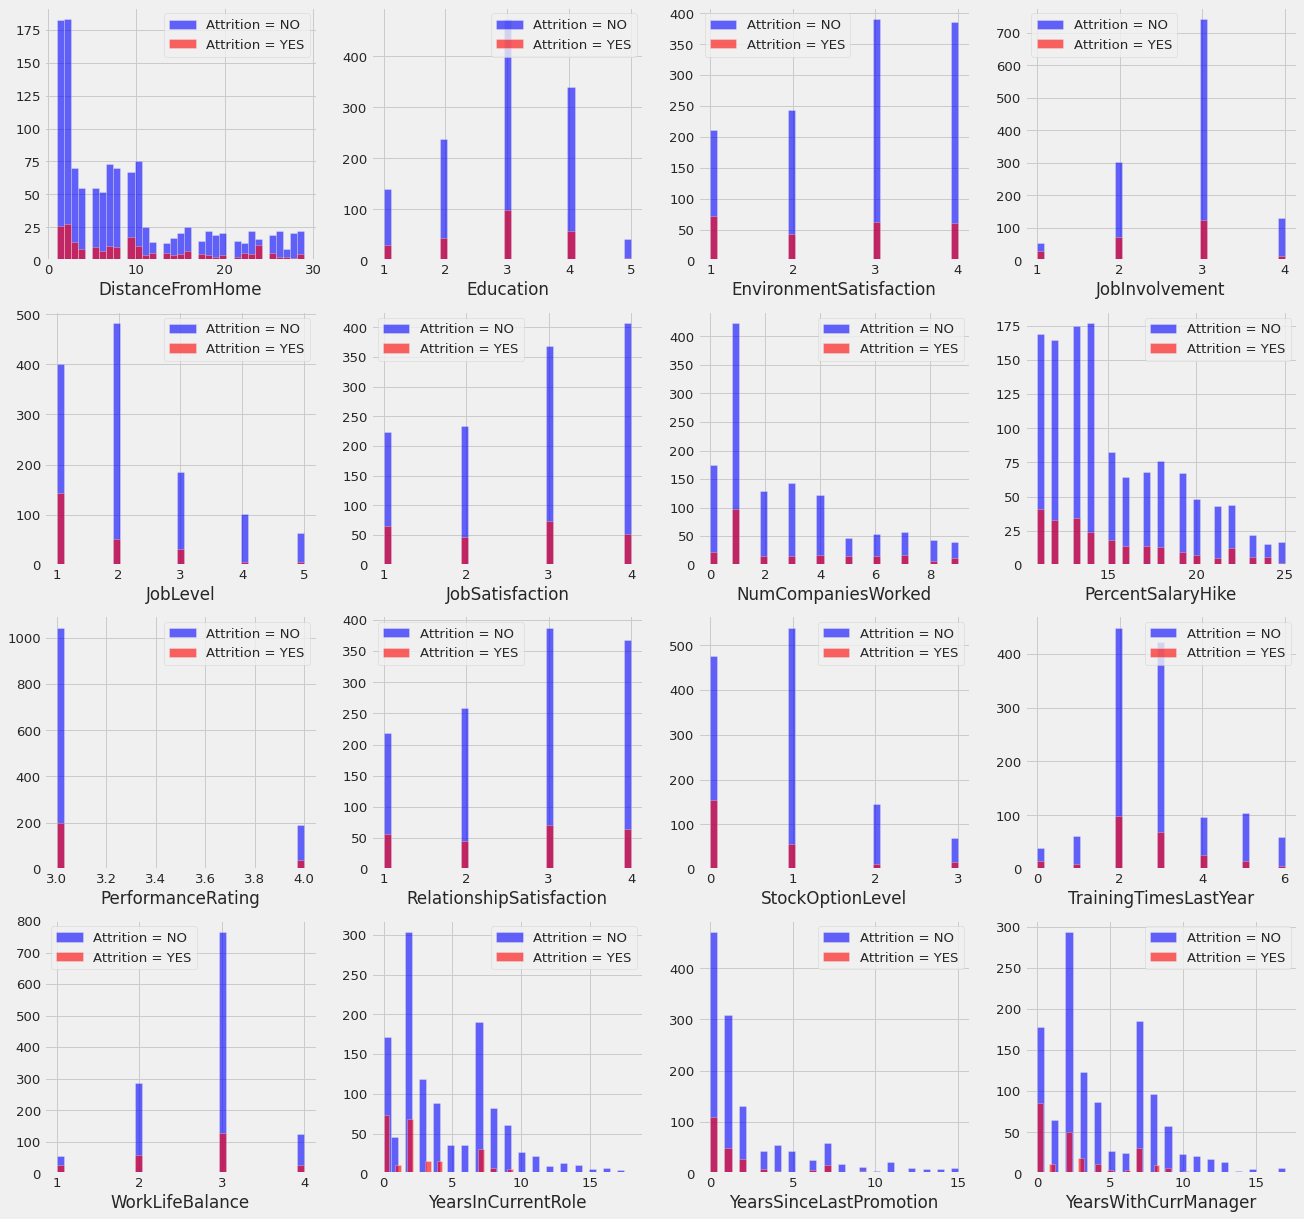

In [90]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

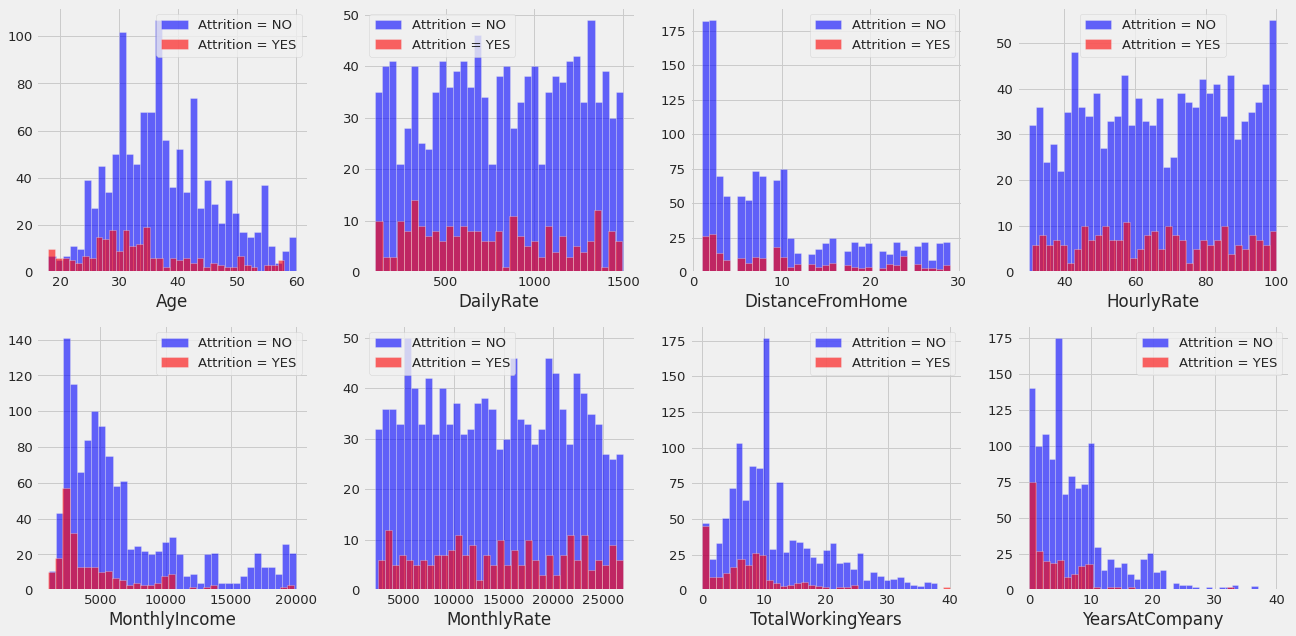

In [91]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Plot on every feature correlate with the "target"

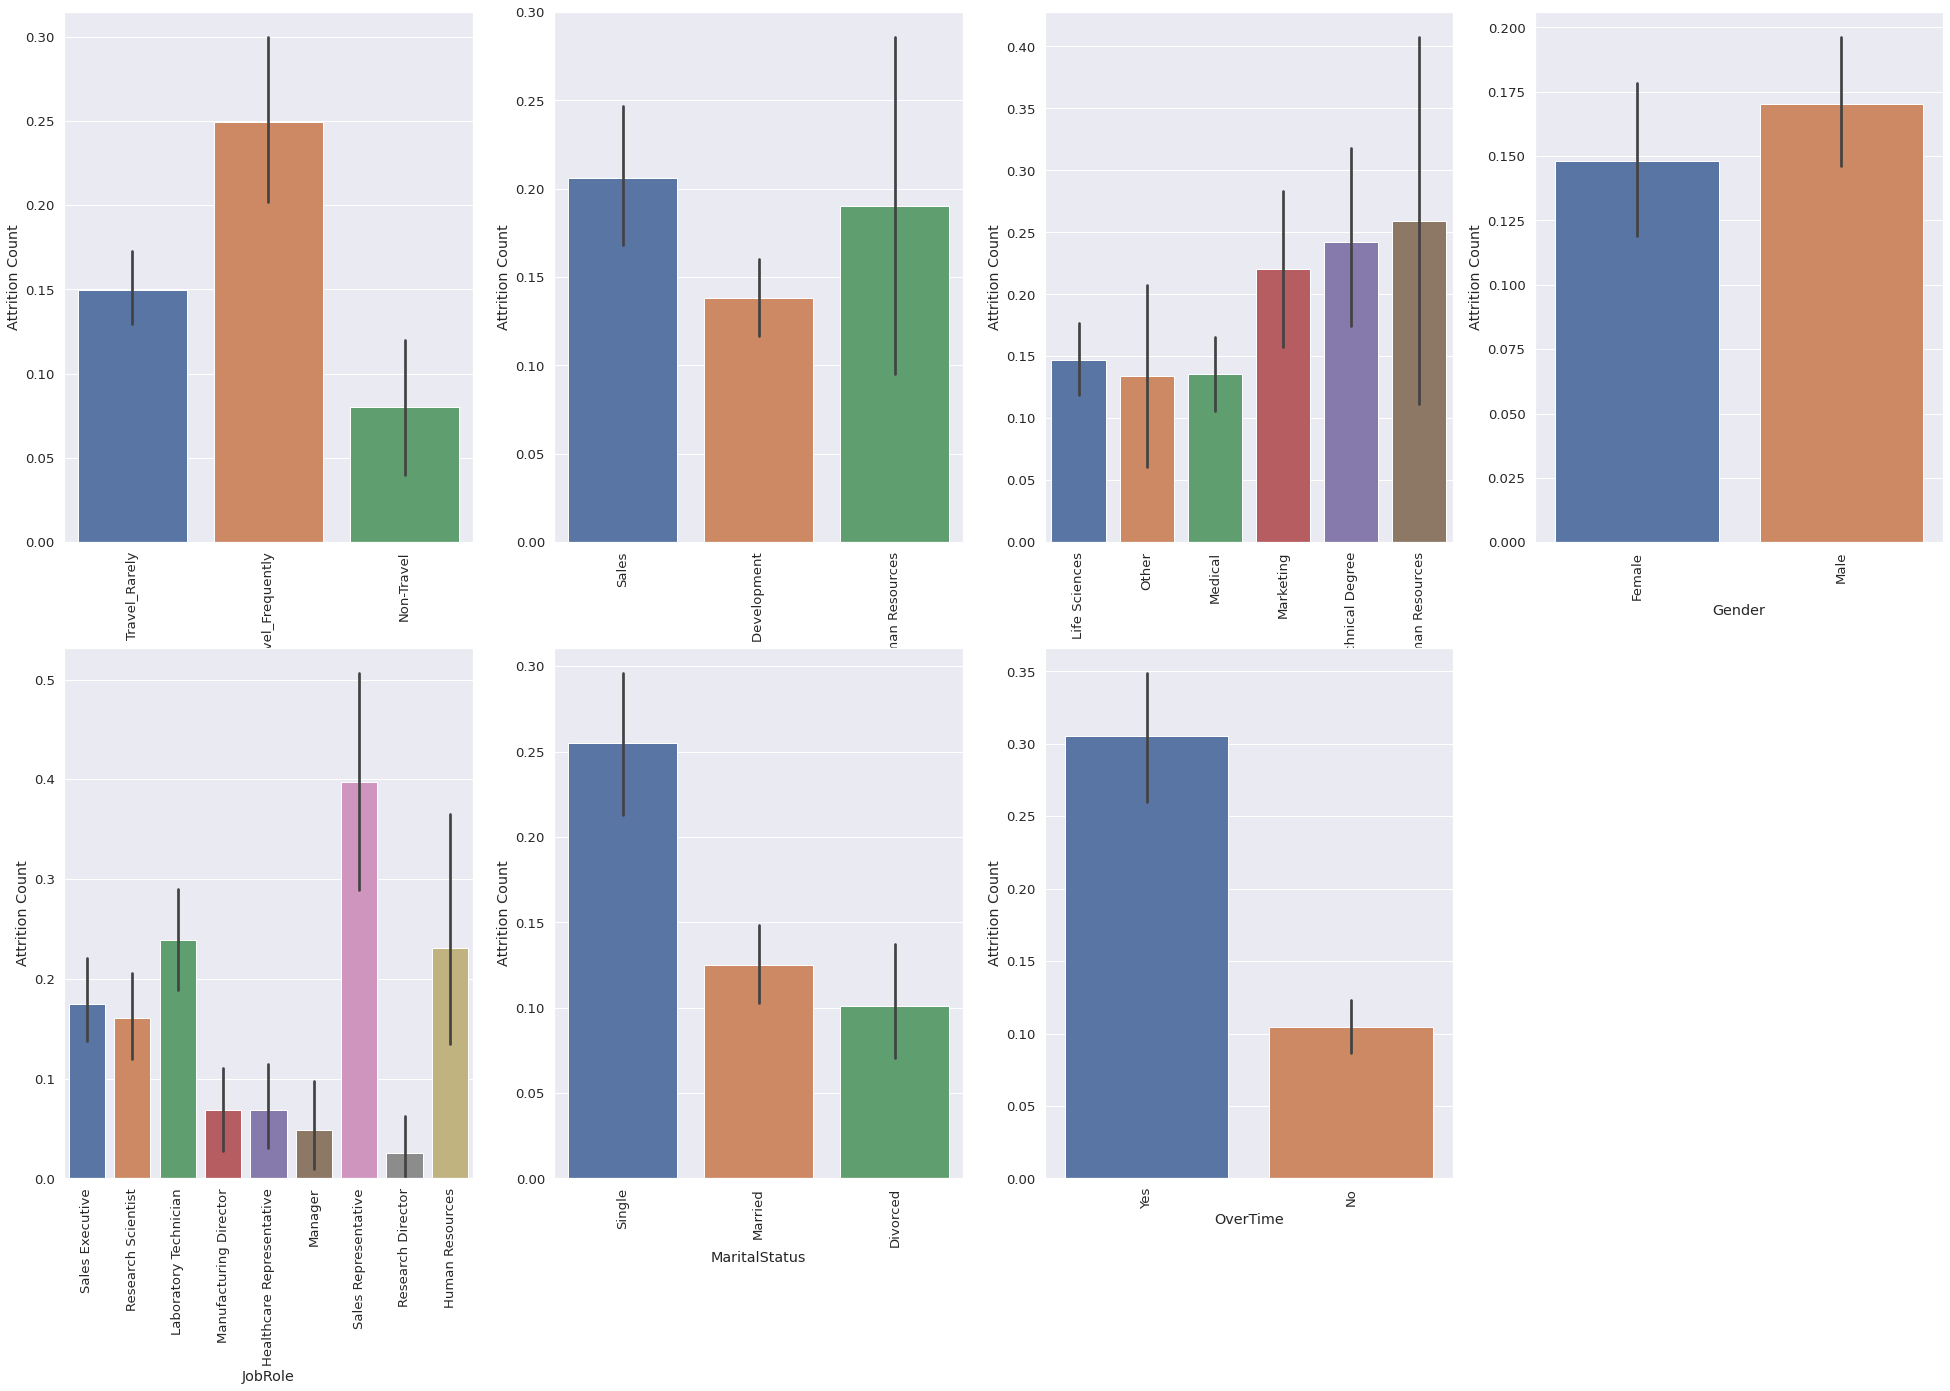

In [93]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 20))


for i, column in enumerate(object_col, 1):
    plt.subplot(2, 4, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

Corelation matrix

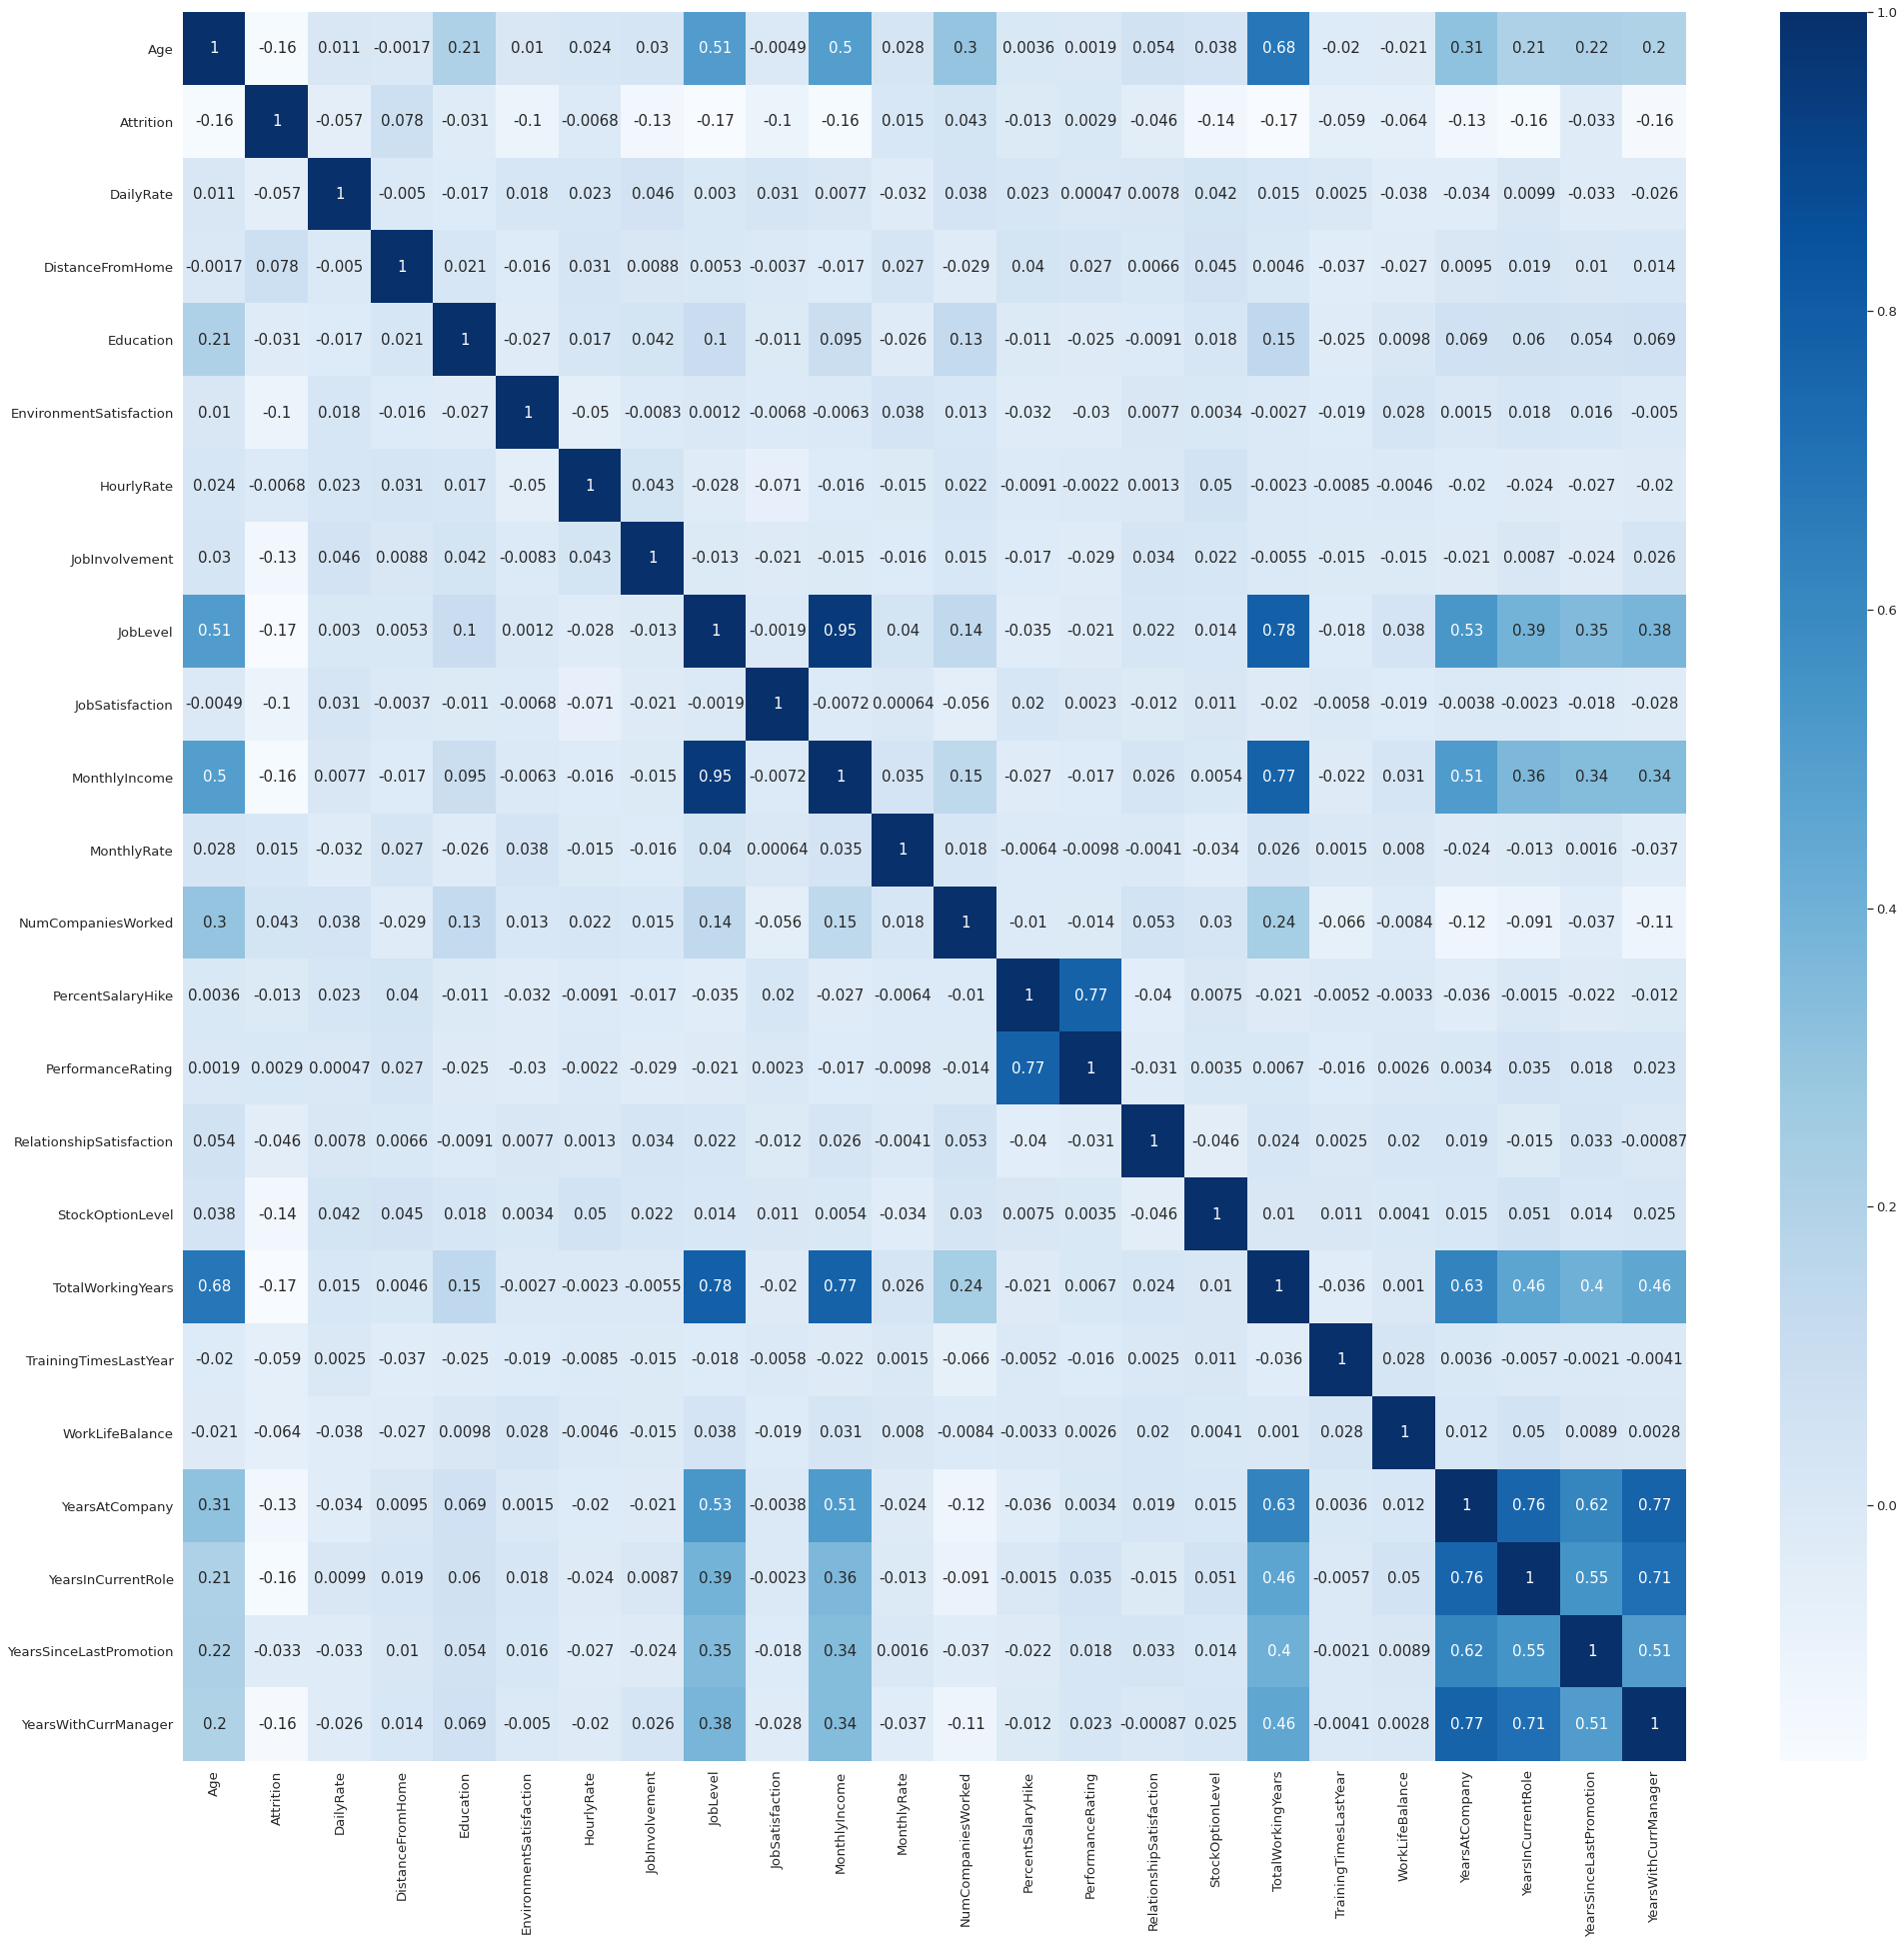

In [94]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="Blues", annot_kws={"size":15})

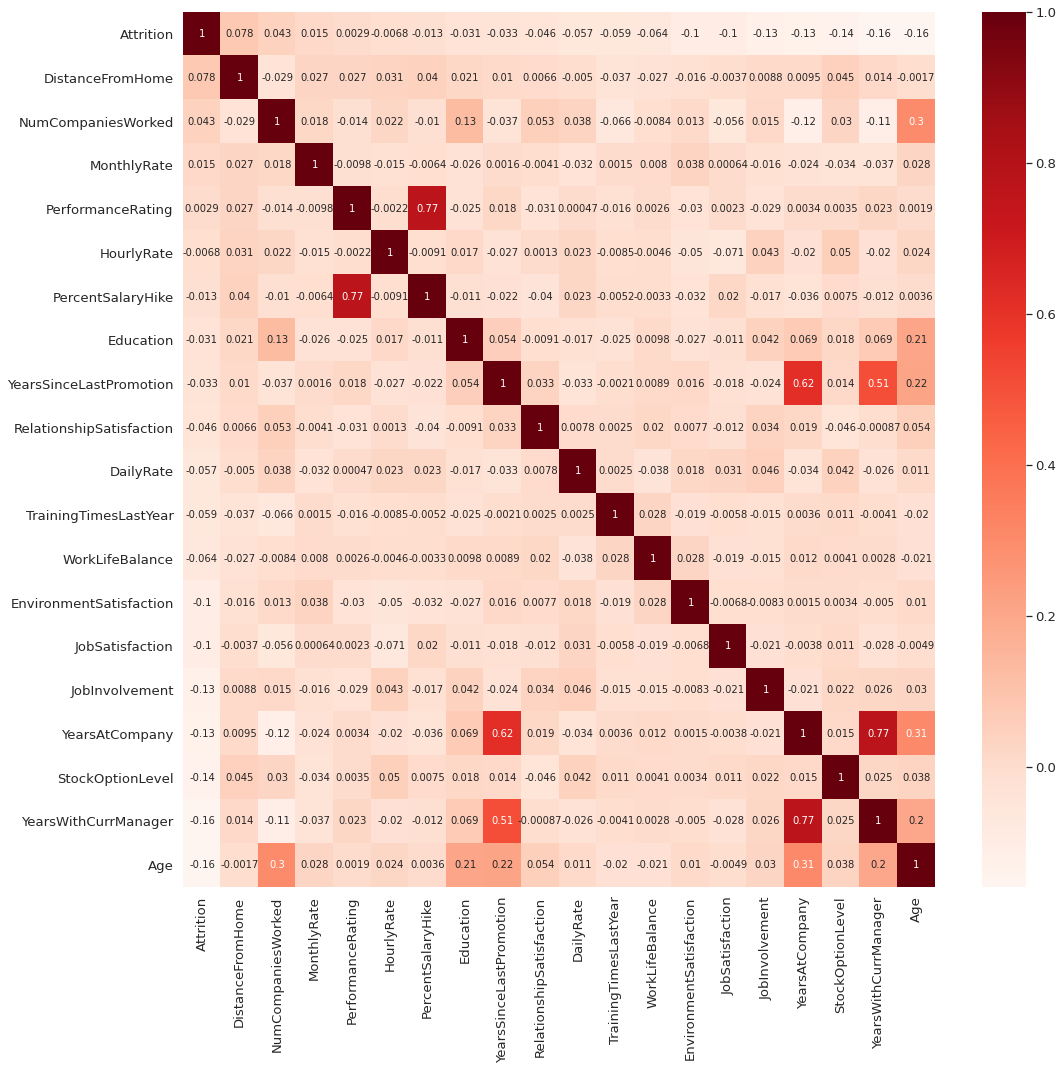

In [95]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, cmap="Reds", annot_kws={"size":10})

Data Pre-processing

In [96]:
for column in object_col:
    df[column] = label.fit_transform(df[column])
print(df.shape)
col_2 = df.corr().nlargest(20, "Attrition").Attrition.index
print(col_2)
col_3 = df.corr().abs().nlargest(20, "Attrition").Attrition.index
print(col_3)

(1470, 31)
Index(['Attrition', 'OverTime', 'MaritalStatus', 'DistanceFromHome', 'JobRole',
       'Department', 'NumCompaniesWorked', 'Gender', 'EducationField',
       'MonthlyRate', 'PerformanceRating', 'BusinessTravel', 'HourlyRate',
       'PercentSalaryHike', 'Education', 'YearsSinceLastPromotion',
       'RelationshipSatisfaction', 'DailyRate', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')
Index(['Attrition', 'OverTime', 'TotalWorkingYears', 'JobLevel',
       'MaritalStatus', 'YearsInCurrentRole', 'MonthlyIncome', 'Age',
       'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany',
       'JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'DistanceFromHome', 'JobRole', 'Department', 'WorkLifeBalance',
       'TrainingTimesLastYear', 'DailyRate'],
      dtype='object')


Uing classification algorithms


Function for printing score (defining it for all models)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:

accuracy score: 0.8321995464852607

Classification Report: 
 	Precision: 0.3968253968253968
	Recall Score: 0.4098360655737705
	F1 score: 0.40322580645161293

Confusion Matrix: 
 [[342  38]
 [ 36  25]]



Decision Tree hyperparameter tuning

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20)), 
          }

X = df[col_3].drop("Attrition", axis="columns")
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=11, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=42, splitter='best')
tree.fit(X_train, y_train)
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8892

Classification Report: 
 	Precision: 0.7540983606557377
	Recall Score: 0.5227272727272727
	F1 score: 0.6174496644295302

Confusion Matrix: 
 [[823  30]
 [ 84  92]]

Test Result:

accuracy score: 0.854875283446712

Classification Report: 
 	Precision: 0.46511627906976744
	Recall Score: 0.32786885245901637
	F1 score: 0.3846153846153846

Confusion Matrix: 
 [[357  23]
 [ 41  20]]



/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:

accuracy score: 0.8684807256235828

Classification Report: 
 	Precision: 0.5882352941176471
	Recall Score: 0.16393442622950818
	F1 score: 0.25641025641025644

Confusion Matrix: 
 [[373   7]
 [ 51  10]]



Random Forest hyperparameter tuning



a) Randomized Search Cross Validation

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rand_forest = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=80, max_features='sqrt', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:

accuracy score: 0.8684807256235828

Classification Report: 
 	Precision: 0.5789473684210527
	Recall Score: 0.18032786885245902
	F1 score: 0.275

Confusion Matrix: 
 [[372   8]
 [ 50  11]]



XGB classifier

In [0]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

n_estimators = [50, 100, 150, 200]
max_depth = [2, 3, 5]
booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5, 0.75]
learning_rate = [0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators,  'max_depth': max_depth,  'learning_rate' : learning_rate,  'min_child_weight' : min_child_weight, 'booster' : booster,  'base_score' : base_score}

xgb_grid_search_cv = GridSearchCV(xgb_model, hyperparameter_grid, scoring="roc_auc",  n_jobs=-1, verbose=1, cv=3, iid=True)
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0, max_depth=2, min_child_weight=2, missing=None, n_estimators=50, n_jobs=1, nthread=None, objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=1, verbosity=1)

xgb.fit(X_train, y_train)

print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8863

Classification Report: 
 	Precision: 0.8734177215189873
	Recall Score: 0.39204545454545453
	F1 score: 0.5411764705882353

Confusion Matrix: 
 [[843  10]
 [107  69]]

Test Result:

accuracy score: 0.8752834467120182

Classification Report: 
 	Precision: 0.75
	Recall Score: 0.14754098360655737
	F1 score: 0.24657534246575344

Confusion Matrix: 
 [[377   3]
 [ 52   9]]



XCG Classifier hyperparameter tuning

In [0]:
print(df.Attrition.value_counts())
from sklearn.utils import resample

minority_class = df[df.Attrition == 1]
majority_class = df[df.Attrition == 0]

majority_downsample = resample(majority_class, replace=False,     # sample with replacement
                               n_samples=237,    # to match minority class
                               random_state=42) 

data_2 = pd.concat([majority_downsample, minority_class])

data_2.Attrition.value_counts()
X = data_2.drop("Attrition", axis="columns")
y = data_2.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

0    1233
1     237
Name: Attrition, dtype: int64


In [0]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

n_estimators = [100, 150, 200]
max_depth = [2, 3, 5]
booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5, 0.75, 0.99]
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators,  'max_depth': max_depth,  'learning_rate' : learning_rate,  'min_child_weight' : min_child_weight, 'booster' : booster, 'base_score' : base_score}

xgb_grid_search_cv = GridSearchCV(xgb_model, hyperparameter_grid, scoring="accuracy",  n_jobs=-1, verbose=1, cv=3, iid=True)
xgb = XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0, max_depth=2, min_child_weight=4, missing=None, n_estimators=100, n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=1, verbosity=1)

xgb.fit(X_train, y_train)

print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9245

Classification Report: 
 	Precision: 0.9329268292682927
	Recall Score: 0.9161676646706587
	F1 score: 0.9244712990936556

Confusion Matrix: 
 [[153  11]
 [ 14 153]]

Test Result:

accuracy score: 0.6713286713286714

Classification Report: 
 	Precision: 0.6533333333333333
	Recall Score: 0.7
	F1 score: 0.6758620689655173

Confusion Matrix: 
 [[47 26]
 [21 49]]



**Conclusion**

The accuracy scores are as follows:

**Decision Tree**

Train score: 1.000

Test score: 0.8321995464852607

**Decision Tree hyperparameter tuning**

Train score: 0.8892

Test score: 0.854875283446712

**Random Forest**

Train score: 1.0000

Test score: 0.8684807256235828

**Random Forest hyperparameter tuning**

Train score: 1.0000

Test score: 0.8684807256235828

**XCG classfier**

Train score: 0.8863

Test score: 0.8752834467120182

**XCG classfier hyperparameter tuned**

Train score: 0.9245

Test score: 0.6713286713286714